In [273]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.ndimage import gaussian_filter1d, gaussian_filter
from skimage import measure, filters
import os

In [24]:
image = cv2.imread('Sundial_sim/sim1_Sundial-1.png')
im = np.sum(image,2)

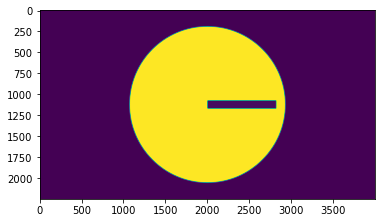

In [18]:
plt.figure()
plt.imshow(im)

In [11]:
print(np.shape(im))
print(im[500][1500])

(2250, 4000, 3)
[161  56 236]


[0.00000000e+00 1.66782488e-02 3.33564976e-02 ... 2.39666435e+01
 2.39833218e+01 2.40000000e+01]


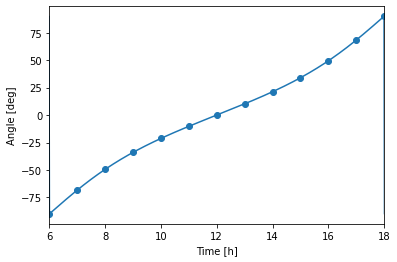

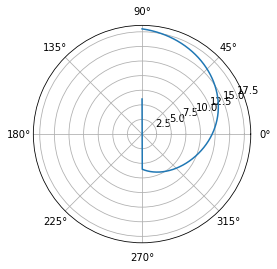

In [231]:
times = np.linspace(0,24,24*60)
times2 = np.linspace(6,18,12*60)
timesH = np.linspace(6,18,13)
timesH[0]+=0.000000001
lengths = np.linspace(1,1,24*60)
lengthsH = np.linspace(1,1,13)
bostonLat = (42 + 21/60 + 40.1220/3600)/180*np.pi
angles = 180/np.pi*np.arctan(np.sin(bostonLat)*np.tan(15/180*np.pi*times))
anglesH = 180/np.pi*np.arctan(np.sin(bostonLat)*np.tan(15/180*np.pi*timesH))
angles2 = 180/np.pi*np.arctan(np.sin(bostonLat)*np.tan(15/180*np.pi*times2))
print(times)
plt.figure()
plt.plot(times,angles)
plt.scatter(timesH,anglesH)
plt.xlim([6,18])
plt.xlabel('Time [h]')
plt.ylabel('Angle [deg]')
plt.figure()
plt.polar(angles2/180*np.pi,times2)
#{\displaystyle \ H_{H}=\tan ^{-1}\left[\ \sin L\ \tan(\ 15^{\circ }\times t\ )\ \right]}

In [274]:
def center_of_mass(im):
    im = np.array(im)
    where = np.where(im)
    xcom = np.mean(where[0])
    ycom = np.mean(where[1])
    return xcom, ycom

def true_center(im):
    im = np.array(im)
    where = np.where(im)
    xmax, xmin = max(where[0]), min(where[0])
    ymax, ymin = max(where[1]), min(where[1])
    xcen = (xmax + xmin)/2
    ycen = (ymax + ymin)/2
    return xcen,ycen,xmax,xmin,ymax,ymin

def mass_estimate(im):
    xcen,ycen,xmax,xmin,ymax,ymin = true_center(im)
    a = xmax-xmin
    b = ymax-ymin
    return np.pi*a*b

def shadow_length(im, gnomon_width = 100):
    w=gnomon_width
    xcen,ycen = true_center(im)[0:2]
    xcom, ycom = center_of_mass(im)
    mass = mass_estimate(im)
    rcom = np.sqrt((xcom-xcen)**2 + (ycom-ycen)**2)
    length = (-w*rcom + np.sqrt((w*rcom)**2+2*w*mass*rcom))/(w)/2
    return length


CoM: 1123.9331526110848, 1987.6541601595982
Center: 1124.5, 1999.5
Angle: 272.7396290961756
Length:798.1810371429582


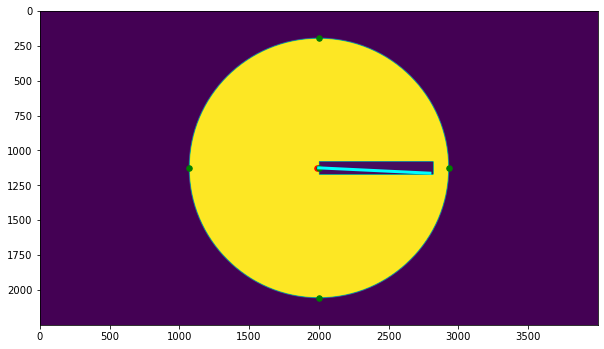

In [163]:
run(figs[30])

In [45]:
im = np.array(im)
where = np.where(im > 100)
print(where)
print(np.shape(where))
print(where[1])
print(where[0])

(array([ 193,  193,  193, ..., 2056, 2056, 2056]), array([1970, 1971, 1972, ..., 2018, 2019, 2020]))
(2, 2654165)
[1970 1971 1972 ... 2018 2019 2020]
[ 193  193  193 ... 2056 2056 2056]


In [83]:
image = cv2.imread(figs[30])
im = np.sum(image,2)
imBW = im > 100 # threshold masking the image
print(true_center(imBW))
print(center_of_mass(imBW))
print(shadow_length(imBW))

(1124.5, 1999.5, 2056, 193, 2931, 1068)
(1123.9331526110848, 1987.6541601595982)
1124.5 1999.5 2056 193 2931 1068
1123.9331526110848 1987.6541601595982
10903742.392707191
11.859394482298455
569184.3107041676


In [154]:
def run(filename):
    image = cv2.imread(filename)
    im = np.sum(image,2)
    imBW = im > 100 # threshold masking the image

    x,y = center_of_mass(imBW) # shadow-shifted center of mass
    x0,y0,xmax,xmin,ymax,ymin = true_center(imBW) # true center of mass

    print("CoM: " + str(x) + ", " + str(y))
    print("Center: " + str(x0) + ", " + str(y0))

    xarc,yarc = x-x0,y-y0
    xarcN = xarc / (np.sqrt(xarc**2+yarc**2))
    yarcN = yarc / (np.sqrt(xarc**2+yarc**2))
    theta = np.arccos(xarc/(np.sqrt(xarc**2+yarc**2)))*(-1)*np.sign(yarc)
    length = shadow_length(imBW)

    plt.figure(figsize=(10,10))
    #ax1 = plt.subplot(1,2,1)
    plt.imshow(im)
    plt.scatter(y,x,c='red',s=30)
    plt.scatter(y0,x0,c='green',s=30)
    plt.scatter([y0,y0,ymax,ymin],[xmax,xmin,x0,x0],c='green',s=30)
    plt.plot([y0,y0+length*np.cos(theta-np.pi/2)],[x0,x0+length*np.sin(theta-np.pi/2)],c='cyan',linewidth=3)
    print('Angle: ' + str((theta+np.pi)*180/np.pi))
    print('Length:' + str(length))
    

In [73]:
def get_paths(directory=r"/Users/hamzaraniwala/Documents/MIT/6.205 - Digital Systems Laboratory/final_project/python_sim/Sundial_sim"):
    figs = os.listdir(directory)
    arr = [os.path.join(directory, fig) for fig in figs]
    return arr    
figs = get_paths(r"/Users/hamzaraniwala/Documents/MIT/6.205 - Digital Systems Laboratory/final_project/python_sim/Sundial_sim")

In [76]:
figs[30]

'/Users/hamzaraniwala/Documents/MIT/6.205 - Digital Systems Laboratory/final_project/python_sim/Sundial_sim/sim1_Sundial-1.png'

CoM: 1124.6300603419882, 2000.6724288995713
Center: 1124.0, 1999.0
1124.0 1999.0 1443 805 2931 1067
1124.6300603419882 2000.6724288995713
3736082.514613897
1.7871749938569128
Angle: 110.6430830559612
Length:181.82467848689356
CoM: 1125.3098508282158, 2000.8257990882385
Center: 1124.0, 1999.0
1124.0 1999.0 1443 805 2931 1067
1125.3098508282158 2000.8257990882385
3736082.514613897
2.2470539608095486
Angle: 125.6561244829071
Length:203.75975046006369
CoM: 1124.2966887827226, 2014.9149448228725
Center: 1124.0, 1999.5
1124.0 1999.5 1838 410 2931 1068
1124.2966887827226 2014.9149448228725
8357779.998274756
15.417799717404447
Angle: 91.10262584136045
Length:795.0066896340376
CoM: 1124.345690252545, 2009.8007773306256
Center: 1124.0, 1999.0
1124.0 1999.0 1443 805 2931 1067
1124.345690252545 2009.8007773306256
3736082.514613897
10.80630800488585
Angle: 91.83318596701301
Length:443.92466173580533
CoM: 1126.178326770061, 2008.5079622952576
Center: 1124.0, 1999.0
1124.0 1999.0 1443 805 2931 1067
1

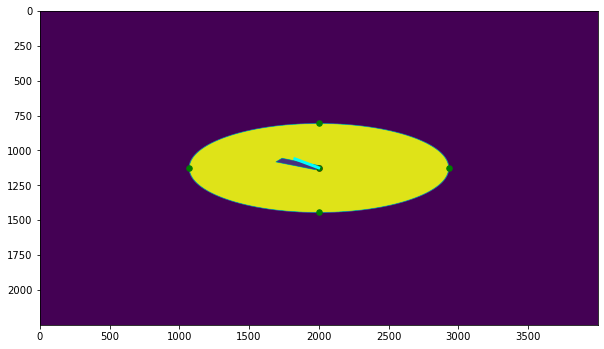

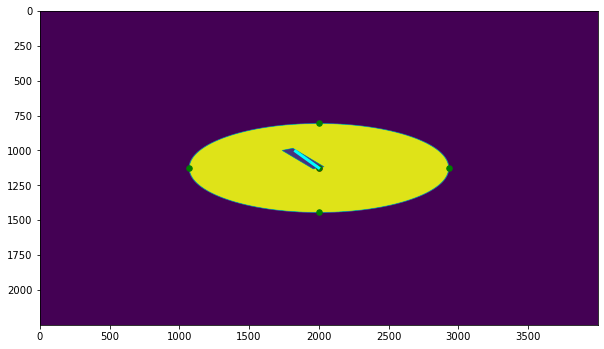

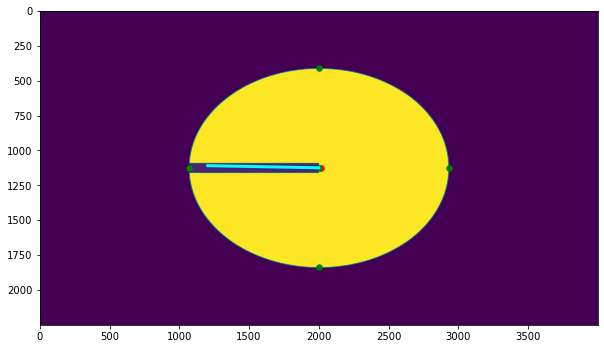

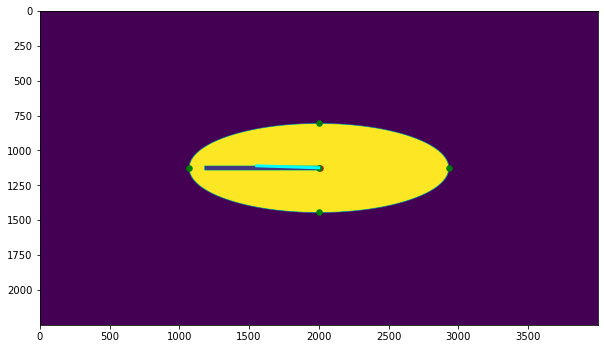

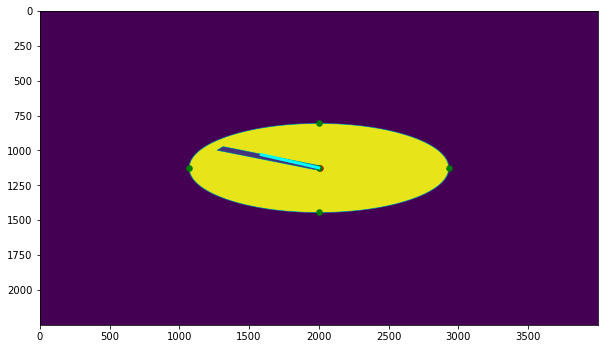

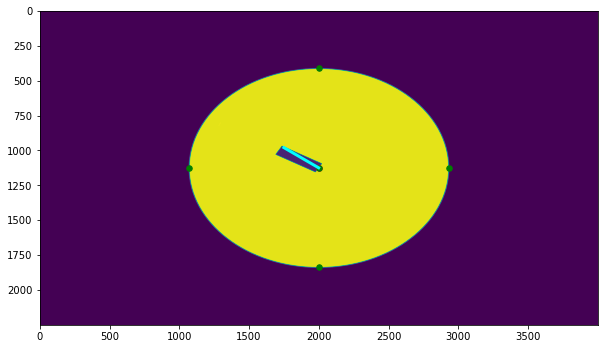

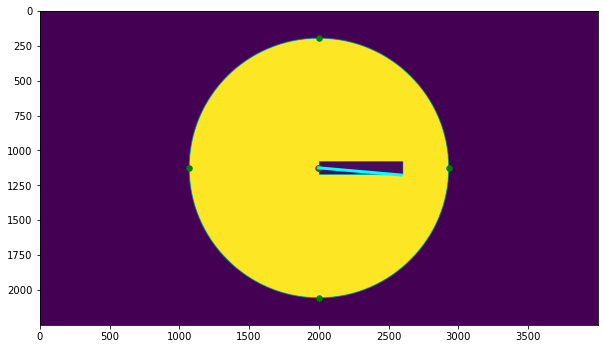

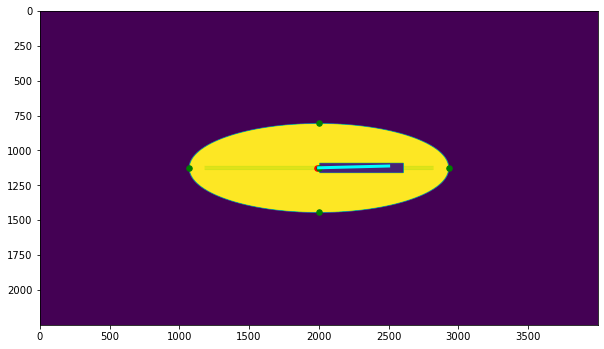

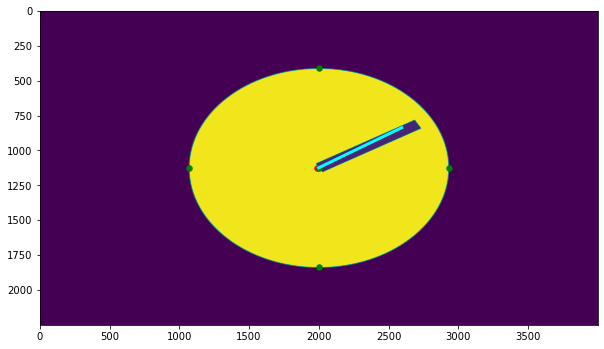

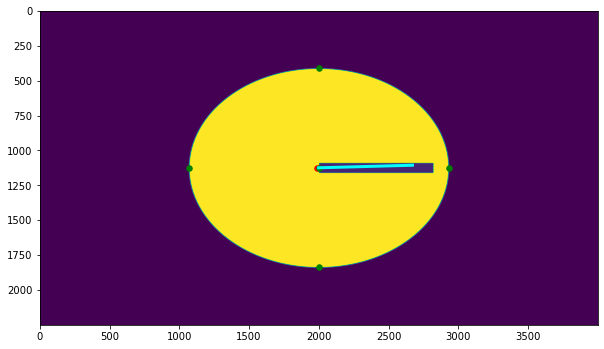

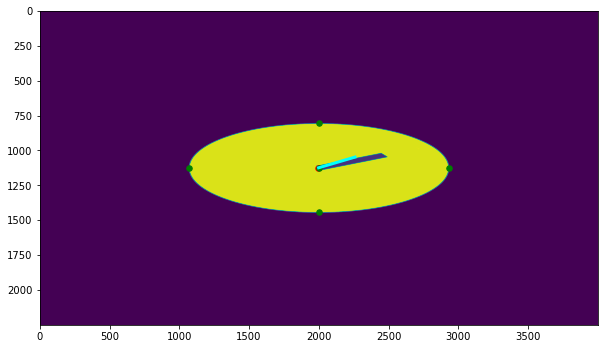

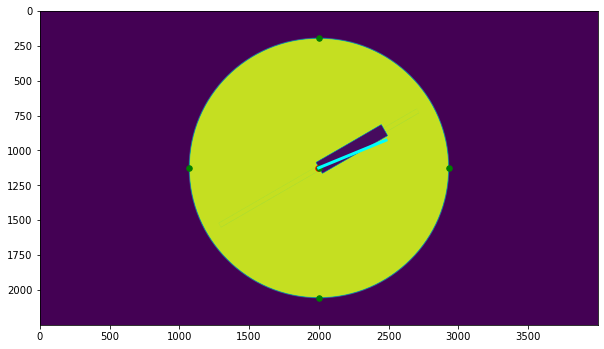

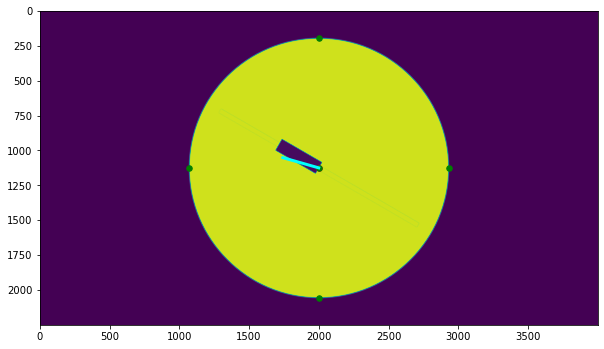

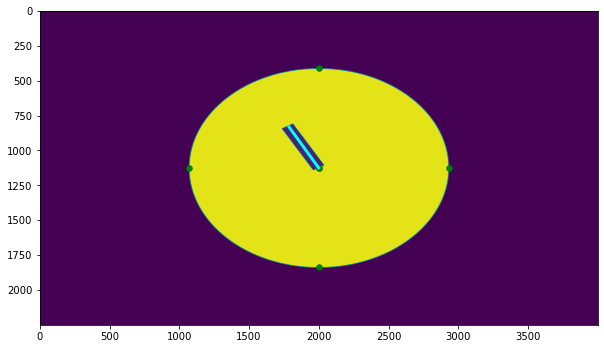

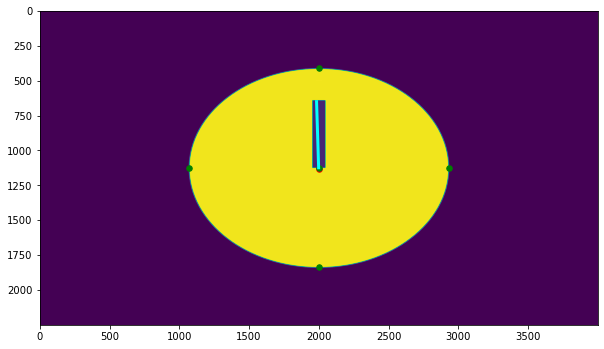

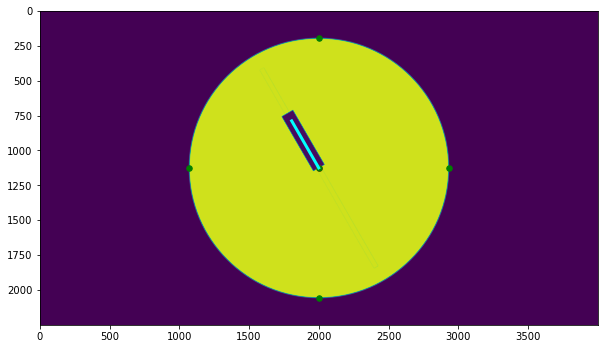

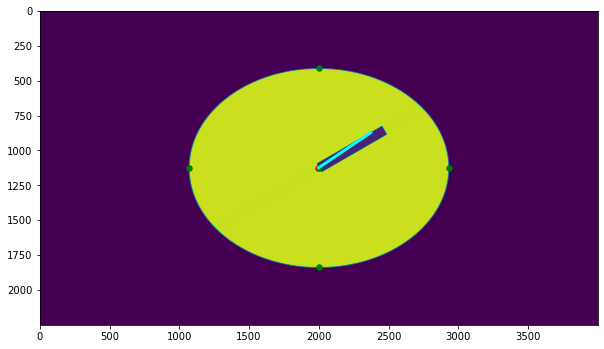

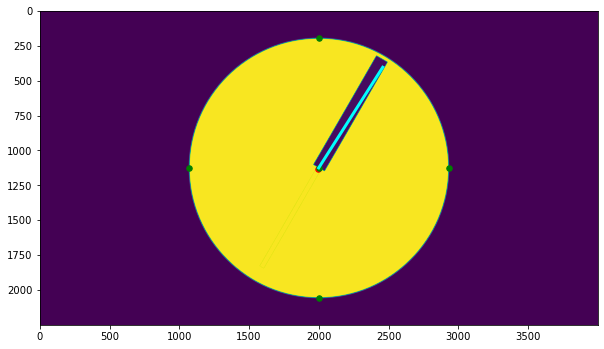

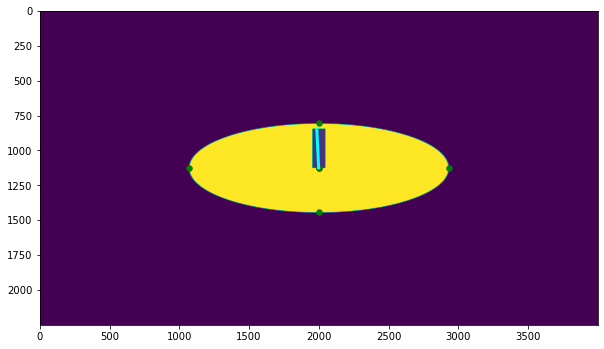

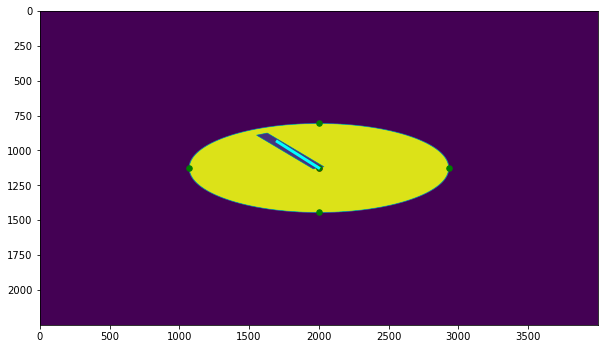

In [116]:
i=0
for fig in figs:
    if i > 0:
        run(fig)
    if i == 20:
        break        
    i+=1


In [269]:
def run(filename,binning=1):
    image = cv2.imread(filename)
    im = np.sum(image,2)
    Nx,Ny = np.shape(im)
    if binning:
        NxNew,NyNew=int(Nx/binning),int(Ny/binning)
        im = im.reshape(NxNew,binning,NyNew,binning).mean(-1).mean(1)
    imBW = im > 100 # threshold masking the image

    x,y = center_of_mass(imBW) # shadow-shifted center of mass
    x0,y0,xmax,xmin,ymax,ymin = true_center(imBW) # true center of mass

    print("CoM: " + str(x) + ", " + str(y))
    print("Center: " + str(x0) + ", " + str(y0))

    xarc,yarc = x-x0,y-y0
    xarcN = xarc / (np.sqrt(xarc**2+yarc**2))
    yarcN = yarc / (np.sqrt(xarc**2+yarc**2))
    theta = np.arccos(xarc/(np.sqrt(xarc**2+yarc**2)))*(-1)*np.sign(yarc)
    if binning:
        width = 100/binning
    else:
        width=100
    length = shadow_length(imBW,gnomon_width=width)

    plt.figure(figsize=(10,5))
    #ax1 = plt.subplot(1,2,1)
    plt.imshow(im)
    plt.scatter(y,x,c='red',s=30)
    plt.scatter(y0,x0,c='green',s=30)
    plt.scatter([y0,y0,ymax,ymin],[xmax,xmin,x0,x0],c='green',s=30)
    plt.plot([y0,y0+length*np.cos(theta-np.pi/2)],[x0,x0+length*np.sin(theta-np.pi/2)],c='cyan',linewidth=3)
    plt.xlim([100,300])
    print('Angle: ' + str(-(theta-np.pi/2)*180/np.pi))
    print('Length:' + str(length*binning))
    angle = -(theta-np.pi/2)*180/np.pi
    return angle, length*binning

CoM: 1123.9331526110848, 1987.6541601595982
Center: 1124.5, 1999.5
Angle: 2.7396290961755505
Length:798.1810371429582


(-2.7396290961755505, 798.1810371429582)

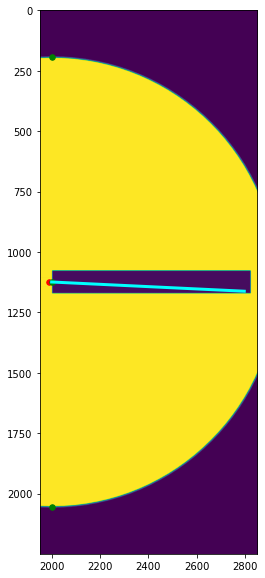

In [201]:
run(figs[30],binning=1)

CoM: 561.7193071060824, 993.5226298610745
Center: 561.5, 999.5
Angle: 267.8987853069189
Length:801.1935432065288


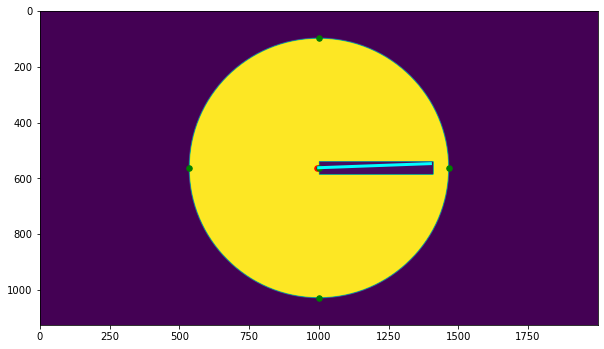

In [176]:
run(figs[30],binning=2)

CoM: 224.3819846810435, 397.1539526864701
Center: 224.5, 399.5
Angle: 272.87977347205225
Length:790.9166498889467


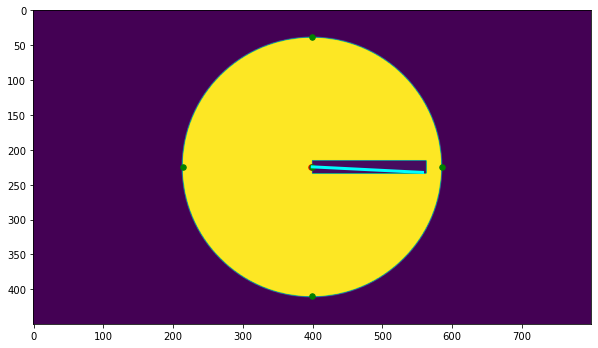

In [177]:
run(figs[30],binning=5)

CoM: 111.93222251476286, 198.3361793357656
Center: 112.0, 199.5
Angle: 273.33297274089665
Length:787.9957694093325


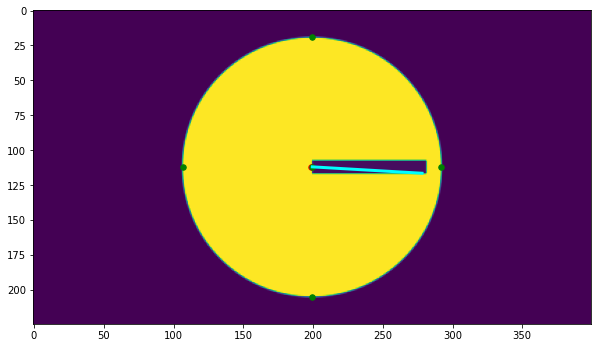

In [178]:
run(figs[30],binning=10)

CoM: 44.494606003752345, 79.0030487804878
Center: 44.5, 79.5
Angle: 270.62187408256494
Length:800.0482270433836


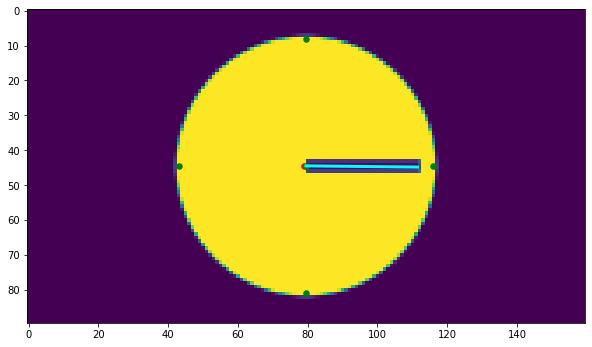

In [182]:
run(figs[30],binning=25)

CoM: 21.96551724137931, 39.383847549909255
Center: 22.0, 39.5
Angle: 286.5348378573454
Length:559.9058654407996


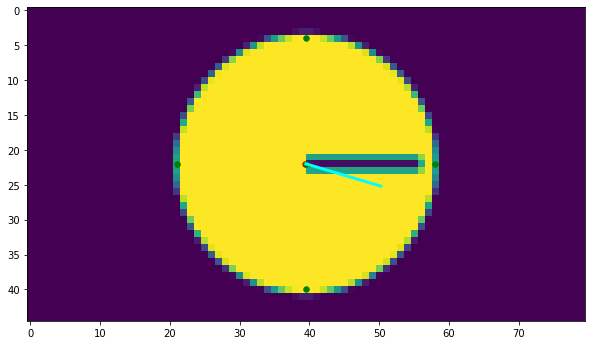

In [183]:
run(figs[30],binning=50)

In [271]:
figs2 = [
    '/Users/hamzaraniwala/Documents/MIT/6.205 - Digital Systems Laboratory/final_project/python_sim/Sundial_sim/sim1_Sundial-2.png',
    '/Users/hamzaraniwala/Documents/MIT/6.205 - Digital Systems Laboratory/final_project/python_sim/Sundial_sim/sim1_Sundial-3.png',
    '/Users/hamzaraniwala/Documents/MIT/6.205 - Digital Systems Laboratory/final_project/python_sim/Sundial_sim/sim1_Sundial-4.png',
    '/Users/hamzaraniwala/Documents/MIT/6.205 - Digital Systems Laboratory/final_project/python_sim/Sundial_sim/sim1_Sundial-5.png',
    '/Users/hamzaraniwala/Documents/MIT/6.205 - Digital Systems Laboratory/final_project/python_sim/Sundial_sim/sim1_Sundial-6.png'
]

(5, 6)
CoM: 1129.644875522408, 1989.2484590515699
Center: 1124.5, 1999.5
Angle: 26.650409851152144
Length:785.0680054747213
CoM: 564.5593243324694, 994.3863284310771
Center: 561.5, 999.5
Angle: 30.89055361713278
Length:799.7003322180706
CoM: 225.5037383705601, 397.4939357414592
Center: 224.5, 399.5
Angle: 26.58118583338128
Length:773.0211848389109
CoM: 112.4737632873831, 198.53795590279083
Center: 112.0, 199.5
Angle: 26.2181645545263
Length:755.9904424431392
CoM: 44.68755824790308, 79.15027958993477
Center: 44.5, 79.5
Angle: 28.20506543269381
Length:715.5016171999232
CoM: 22.036429872495447, 39.37795992714025
Center: 22.0, 39.5
Angle: 16.620756913891967
Length:573.9710206874421
CoM: 1133.839437135453, 1993.4507467150977
Center: 1124.5, 1999.5
Angle: 57.06843821517452
Length:773.3337980007763
CoM: 566.6492433295009, 996.4811333406667
Center: 561.5, 999.5
Angle: 59.61801945680354
Length:800.3654326401133
CoM: 226.32640262161704, 398.31664689153814
Center: 224.5, 399.5
Angle: 57.060204642

/var/folders/kf/jwp9_zgs6gs40cglnhbzm13h0000gn/T/ipykernel_64723/3147555985.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


CoM: 112.87199038425422, 200.0156631484055
Center: 112.0, 199.5
Angle: 120.59851388743564
Length:734.9291859810612
CoM: 44.82968313140727, 79.67660764212488
Center: 44.5, 79.5
Angle: 118.17746644297446
Length:694.7518772746765
CoM: 22.10200364298725, 39.57832422586521
Center: 22.0, 39.5
Angle: 127.51911382047645
Length:576.7526137061327
CoM: 1129.6537625100252, 2009.0782039734481
Center: 1124.5, 1999.5
Angle: 151.7165533033584
Length:764.6362387634648
CoM: 564.5630223990236, 1004.2698430636862
Center: 561.5, 999.5
Angle: 147.29287594644035
Length:780.1194662721111
CoM: 225.5063422259471, 401.3804582222934
Center: 224.5, 399.5
Angle: 151.84618186745902
Length:753.9007131801516
CoM: 112.47545355519664, 200.414641475416
Center: 112.0, 199.5
Angle: 152.5334590633431
Length:741.3077157671457
CoM: 44.68779123951538, 79.81849953401678
Center: 44.5, 79.5
Angle: 149.47587607464317
Length:690.803559069974
CoM: 22.036429872495447, 39.62204007285975
Center: 22.0, 39.5
Angle: 163.37924308610803
Len

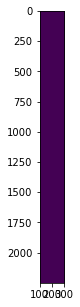

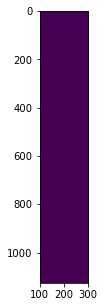

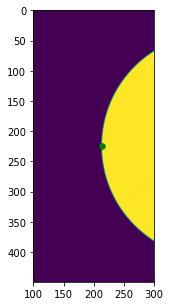

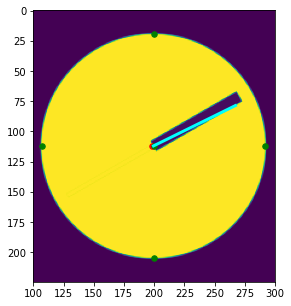

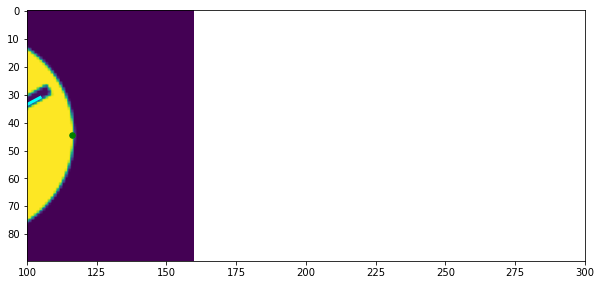

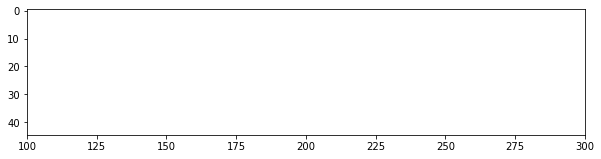

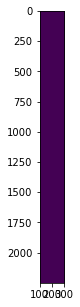

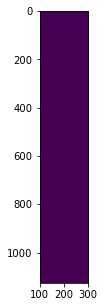

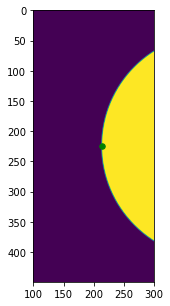

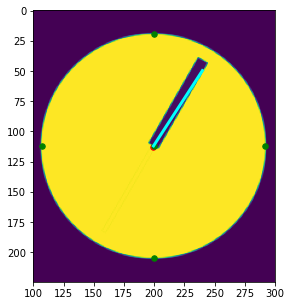

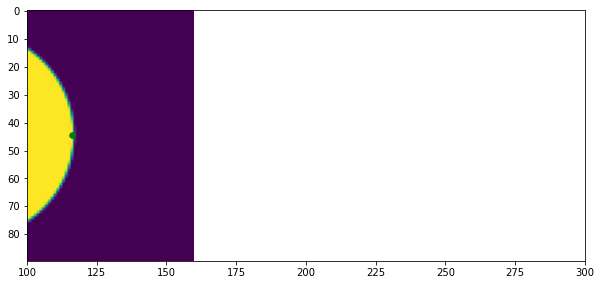

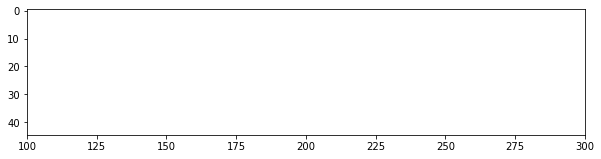

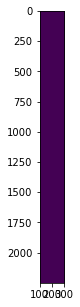

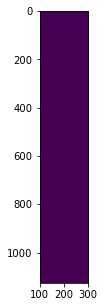

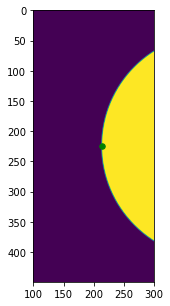

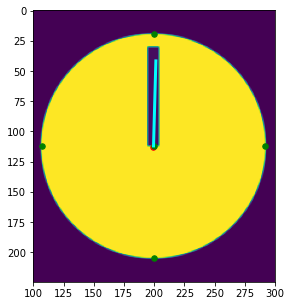

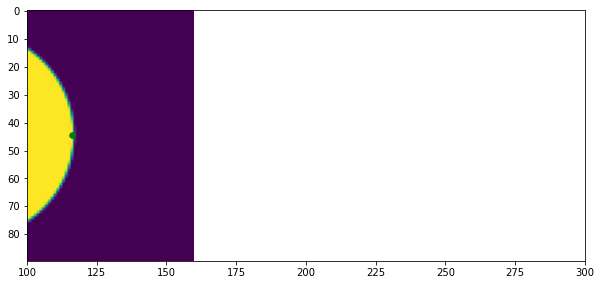

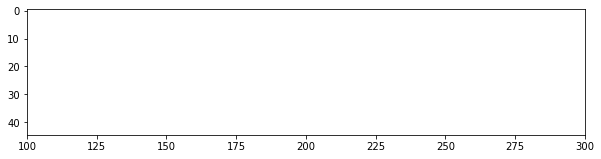

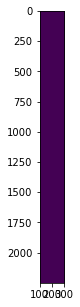

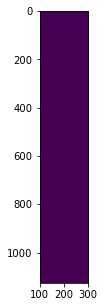

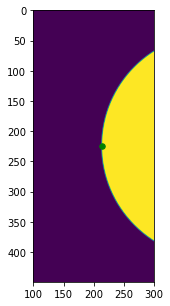

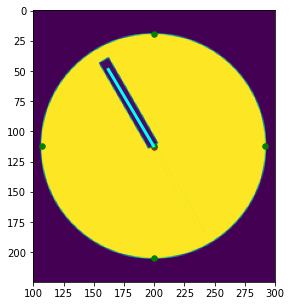

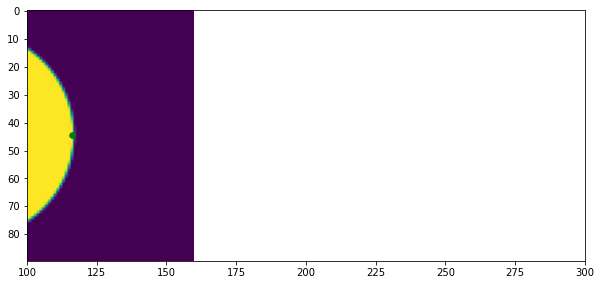

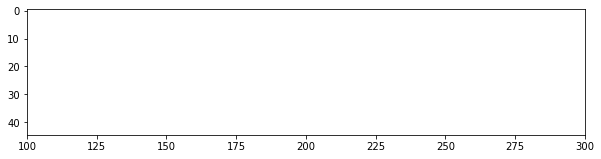

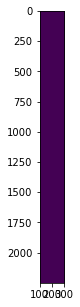

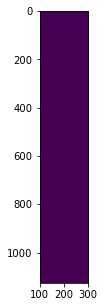

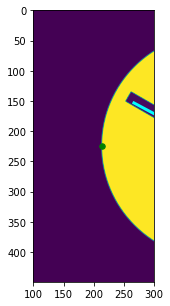

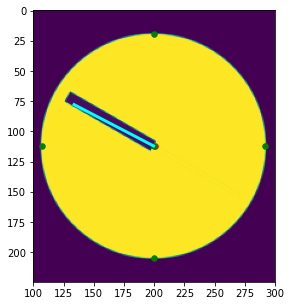

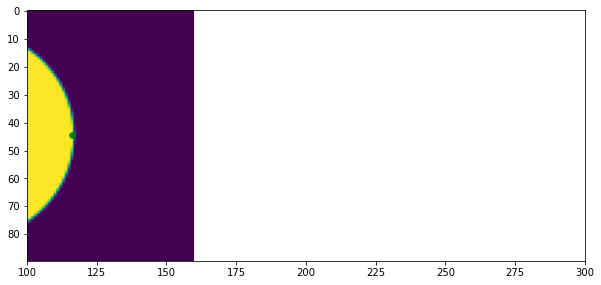

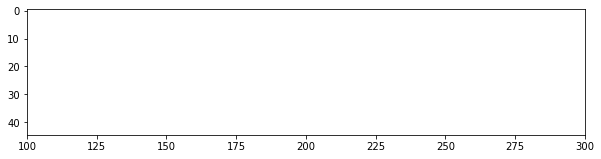

In [275]:
angles0 = [30,60,90,120,150]
realLength = 800
deltaAngles = np.zeros((5,6))
binnings = [1,2,5,10,25,50]
deltaLengths = np.zeros((5,6))
print(np.shape(deltaAngles))
for i, fig in enumerate(figs2):
    for j, binning in enumerate(binnings):
        dA, dL = run(fig,binning=binning)
        dA = np.abs(dA - angles0[i])
        dL = np.abs(dL - realLength)
        deltaAngles[i,j]=dA
        deltaLengths[i,j]=dL

Text(0, 0.5, 'Shadow length errror [pixels]')

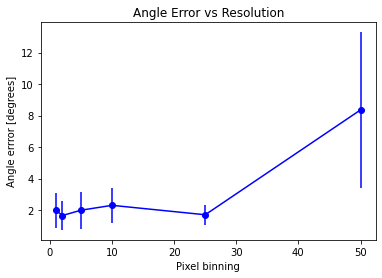

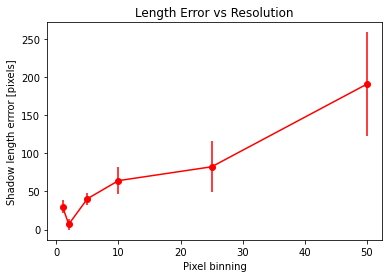

In [225]:
plt.figure()
plt.scatter(binnings,np.mean(deltaAngles,0),c='blue')
plt.errorbar(binnings,np.mean(deltaAngles,0),yerr=np.std(deltaAngles,0),c='blue')
plt.title('Angle Error vs Resolution')
plt.xlabel('Pixel binning')
plt.ylabel('Angle errror [degrees]')
plt.figure()
plt.scatter(binnings,np.mean(deltaLengths,0),c='red')
plt.errorbar(binnings,np.mean(deltaLengths,0),yerr=np.std(deltaLengths,0),c='red')
plt.title('Length Error vs Resolution')
plt.xlabel('Pixel binning')
plt.ylabel('Shadow length errror [pixels]')

In [248]:
thetas = np.linspace(np.arctan(0)*180/np.pi,np.arctan(1)*180/np.pi,46)
ratios = np.tan(thetas/180*np.pi)

Text(0, 0.5, 'arctan(y/x) [deg]')

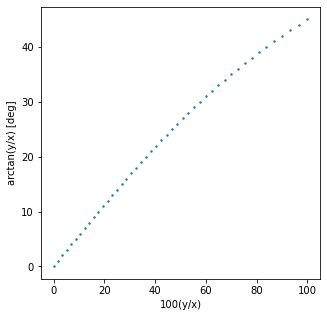

In [281]:
plt.figure(figsize=(5,5))
plt.scatter(100*ratios,thetas,s=2)
plt.xlabel('100(y/x)')
plt.ylabel('arctan(y/x) [deg]')

In [263]:
print(np.round(ratios*100).astype(int))

[  0   2   3   5   7   9  11  12  14  16  18  19  21  23  25  27  29  31
  32  34  36  38  40  42  45  47  49  51  53  55  58  60  62  65  67  70
  73  75  78  81  84  87  90  93  97 100]


In [264]:
import collections

binaries = np.zeros(46)
decimals = np.zeros(46)
for i in range(len(binaries)):
    decimals[i] = (np.round(ratios[i]*100))
    binaries[i] = np.binary_repr(int(np.round(ratios[i]*100)))

decimals = decimals.astype(int)
binaries = binaries.astype(int)
print(decimals)
print(binaries)

def list_duplicates(seq):
  seen = set()
  seen_add = seen.add
  # adds all elements it doesn't know yet to seen and all other to seen_twice
  seen_twice = set( x for x in seq if x in seen or seen_add(x) )
  # turn the set into a list (as requested)
  return list( seen_twice )

list_duplicates(binaries) # yields [1, 2, 5]

[  0   2   3   5   7   9  11  12  14  16  18  19  21  23  25  27  29  31
  32  34  36  38  40  42  45  47  49  51  53  55  58  60  62  65  67  70
  73  75  78  81  84  87  90  93  97 100]
[      0      10      11     101     111    1001    1011    1100    1110
   10000   10010   10011   10101   10111   11001   11011   11101   11111
  100000  100010  100100  100110  101000  101010  101101  101111  110001
  110011  110101  110111  111010  111100  111110 1000001 1000011 1000110
 1001001 1001011 1001110 1010001 1010100 1010111 1011010 1011101 1100001
 1100100]


[]

In [14]:
# code for generating the lookup tables
import itertools

width = 8

angles = np.linspace(0,45,46).astype(int)

clock_angles = np.zeros(46)
# for i in np.arange(angles):
#     clock_angles[i] = angles[i]

print("module Angles_Lookup(")
print("    input wire [63:0] ratio,")
print("    output logic [7:0] sun_angle_val,")
print("    output logic [7:0] clock_angle_val);")
print("    logic [7:0] lookup_val;")
#print("    input [{}:0] b;".format(b_width - 1))
#print("    output reg [{}:0] z;".format(z_width - 1))
print()
print("    always_comb begin")
print("        case (lookup_val)")

fmt = "            {{2}}'b{{0:0{0}b}}: begin\n                sun_angle_val = {{2}}'b{{1:0{0}b}};\n                clock_angle_val = {{2}}'b{{1:0{0}b}};\n            end".format(width)
for ind, a in enumerate(np.arange(46)):
    print(fmt.format(ind, angles[ind], width))


print("            default: begin\n                sun_angle_val = 8'b00000000;\n                clock_angle_val = 8'b00000000;\n            end")
print("        endcase")
print("    end")
# print the math logic for determining lookup val
print()
print("    always_comb begin")

width64=64
fmt = "        if ((ratio > {{3}}'d{{1}}) && (ratio <= {{3}}'d{{2}})) begin\n                lookup_val = {{4}}'b{{0:0{1}b}};".format(width64,width)
print(fmt.format(0, decimals[0], decimals[1], width64, width))
fmt = "        end else if ((ratio > {{3}}'d{{1}}) && (ratio <= {{3}}'d{{2}})) begin\n                lookup_val = {{4}}'b{{0:0{1}b}};".format(width64,width)
for ind, a in enumerate(np.arange(1,46)):
    print(fmt.format(ind, decimals[ind], decimals[ind+1], width64, width))
print("        end else begin\n            lookup_val = 8'b00000000;\n        end")
print("    end")

print("endmodule")

module Angles_Lookup(
    input wire [63:0] ratio,
    output logic [7:0] sun_angle_val,
    output logic [7:0] clock_angle_val);
    logic [7:0] lookup_val;

    always_comb begin
        case (lookup_val)
            8'b00000000: begin
                sun_angle_val = 8'b00000000;
                clock_angle_val = 8'b00000000;
            end
            8'b00000001: begin
                sun_angle_val = 8'b00000001;
                clock_angle_val = 8'b00000001;
            end
            8'b00000010: begin
                sun_angle_val = 8'b00000010;
                clock_angle_val = 8'b00000010;
            end
            8'b00000011: begin
                sun_angle_val = 8'b00000011;
                clock_angle_val = 8'b00000011;
            end
            8'b00000100: begin
                sun_angle_val = 8'b00000100;
                clock_angle_val = 8'b00000100;
            end
            8'b00000101: begin
                sun_angle_val = 8'b00000101;
                clock_

NameError: name 'decimals' is not defined

In [243]:
print("{{4:0{3}b}}".format(10,1,4,10))

{4:010b}


In [42]:
# code for generating the lookup tables
import itertools
import numpy as np

output_vals = np.arange(0,50020,1000).astype(int)
vals = np.square(output_vals).astype(int)

vals_indexing = vals[1:-2]

width = 32

clock_angles = np.zeros(46)
# for i in np.arange(angles):
#     clock_angles[i] = angles[i]

print("module Sqrt_Lookup(")
print("    input wire [31:0] sqrt_input,")
print("    output logic [31:0] sqrt_output);")
print()
print("    always_comb begin")
width64=32
fmt = "        if ((sqrt_input > {{3}}'d{{1}}) && (sqrt_input <= {{3}}'d{{2}})) begin\n                sqrt_output = {{4}}'d{{0}};".format(width64,width)
print(fmt.format(output_vals[1], vals[1], vals[2], width64, width))
fmt = "        end else if ((sqrt_input > {{3}}'d{{1}}) && (sqrt_input <= {{3}}'d{{2}})) begin\n                sqrt_output = {{4}}'d{{0}};".format(width64,width)
for ind, a in enumerate(vals_indexing):
    print(fmt.format(output_vals[ind+2], vals[ind+2], vals[ind+3], width64, width))
print("        end else begin\n            sqrt_output = 32'd0;\n        end")
print("    end")

print("endmodule")

module Sqrt_Lookup(
    input wire [31:0] sqrt_input,
    output logic [31:0] sqrt_output);

    always_comb begin
        if ((sqrt_input > 32'd1000000) && (sqrt_input <= 32'd4000000)) begin
                sqrt_output = 32'd1000;
        end else if ((sqrt_input > 32'd4000000) && (sqrt_input <= 32'd9000000)) begin
                sqrt_output = 32'd2000;
        end else if ((sqrt_input > 32'd9000000) && (sqrt_input <= 32'd16000000)) begin
                sqrt_output = 32'd3000;
        end else if ((sqrt_input > 32'd16000000) && (sqrt_input <= 32'd25000000)) begin
                sqrt_output = 32'd4000;
        end else if ((sqrt_input > 32'd25000000) && (sqrt_input <= 32'd36000000)) begin
                sqrt_output = 32'd5000;
        end else if ((sqrt_input > 32'd36000000) && (sqrt_input <= 32'd49000000)) begin
                sqrt_output = 32'd6000;
        end else if ((sqrt_input > 32'd49000000) && (sqrt_input <= 32'd64000000)) begin
                sqrt_output = 32'd7000;
   

In [45]:
# code for generating the finer resolution sqrt lookup table
import itertools
import numpy as np

output_vals = np.arange(0,1020,5).astype(int)
vals = np.square(output_vals).astype(int)

vals_indexing = vals[1:-2]

width = 11

clock_angles = np.zeros(46)
# for i in np.arange(angles):
#     clock_angles[i] = angles[i]

print("module Sqrt_Fine_Lookup(")
print("    input wire [31:0] sqrt_input,")
print("    output logic [11:0] sqrt_output);")
print()
print("    always_comb begin")
width64=31
fmt = "        if ((sqrt_input > {{3}}'d{{1}}) && (sqrt_input <= {{3}}'d{{2}})) begin\n                sqrt_output = {{4}}'d{{0}};".format(width64,width)
print(fmt.format(output_vals[1], vals[1], vals[2], width64, width))
fmt = "        end else if ((sqrt_input > {{3}}'d{{1}}) && (sqrt_input <= {{3}}'d{{2}})) begin\n                sqrt_output = {{4}}'d{{0}};".format(width64,width)
for ind, a in enumerate(vals_indexing):
    print(fmt.format(output_vals[ind+2], vals[ind+2], vals[ind+3], width64, width))
print("        end else begin\n            sqrt_output = 11'd0;\n        end")
print("    end")

print("endmodule")

module Sqrt_Fine_Lookup(
    input wire [31:0] sqrt_input,
    output logic [11:0] sqrt_output);

    always_comb begin
        if ((sqrt_input > 31'd400) && (sqrt_input <= 31'd1600)) begin
                sqrt_output = 11'd20;
        end else if ((sqrt_input > 31'd1600) && (sqrt_input <= 31'd3600)) begin
                sqrt_output = 11'd40;
        end else if ((sqrt_input > 31'd3600) && (sqrt_input <= 31'd6400)) begin
                sqrt_output = 11'd60;
        end else if ((sqrt_input > 31'd6400) && (sqrt_input <= 31'd10000)) begin
                sqrt_output = 11'd80;
        end else if ((sqrt_input > 31'd10000) && (sqrt_input <= 31'd14400)) begin
                sqrt_output = 11'd100;
        end else if ((sqrt_input > 31'd14400) && (sqrt_input <= 31'd19600)) begin
                sqrt_output = 11'd120;
        end else if ((sqrt_input > 31'd19600) && (sqrt_input <= 31'd25600)) begin
                sqrt_output = 11'd140;
        end else if ((sqrt_input > 31'd25600) && (sqrt

In [47]:
# code for generating the finest resolution sqrt lookup table
import itertools
import numpy as np

output_vals = np.arange(0,100,1).astype(int)
vals = np.square(output_vals).astype(int)

vals_indexing = vals[1:-2]

width = 11

clock_angles = np.zeros(46)
# for i in np.arange(angles):
#     clock_angles[i] = angles[i]

print("module Sqrt_Finer_Lookup(")
print("    input wire [31:0] sqrt_input,")
print("    output logic [11:0] sqrt_output);")
print()
print("    always_comb begin")
width64=31
fmt = "        if ((sqrt_input > {{3}}'d{{1}}) && (sqrt_input <= {{3}}'d{{2}})) begin\n                sqrt_output = {{4}}'d{{0}};".format(width64,width)
print(fmt.format(output_vals[1], vals[1], vals[2], width64, width))
fmt = "        end else if ((sqrt_input > {{3}}'d{{1}}) && (sqrt_input <= {{3}}'d{{2}})) begin\n                sqrt_output = {{4}}'d{{0}};".format(width64,width)
for ind, a in enumerate(vals_indexing):
    print(fmt.format(output_vals[ind+2], vals[ind+2], vals[ind+3], width64, width))
print("        end else begin\n            sqrt_output = 11'd0;\n        end")
print("    end")

print("endmodule")

module Sqrt_Finer_Lookup(
    input wire [31:0] sqrt_input,
    output logic [11:0] sqrt_output);

    always_comb begin
        if ((sqrt_input > 31'd1) && (sqrt_input <= 31'd4)) begin
                sqrt_output = 11'd1;
        end else if ((sqrt_input > 31'd4) && (sqrt_input <= 31'd9)) begin
                sqrt_output = 11'd2;
        end else if ((sqrt_input > 31'd9) && (sqrt_input <= 31'd16)) begin
                sqrt_output = 11'd3;
        end else if ((sqrt_input > 31'd16) && (sqrt_input <= 31'd25)) begin
                sqrt_output = 11'd4;
        end else if ((sqrt_input > 31'd25) && (sqrt_input <= 31'd36)) begin
                sqrt_output = 11'd5;
        end else if ((sqrt_input > 31'd36) && (sqrt_input <= 31'd49)) begin
                sqrt_output = 11'd6;
        end else if ((sqrt_input > 31'd49) && (sqrt_input <= 31'd64)) begin
                sqrt_output = 11'd7;
        end else if ((sqrt_input > 31'd64) && (sqrt_input <= 31'd81)) begin
                sqrt_outpu